In [ ]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

#For regression
from sklearn.linear_model import LinearRegression

# Import curve fitting package from scipy - can be used for nonlinear curve fitting; can also be used for linear regression
from scipy.optimize import curve_fit

Let's do a linear fit. We have model data $x_i,y_i;i=0...n-1$ and we want to fit a linear model between the two: $y=a_0+a_1x$. The goal is to figure out what the constants $a_0,a_1$ are.

Text(0.5, 1.0, 'Dummy data with noise')

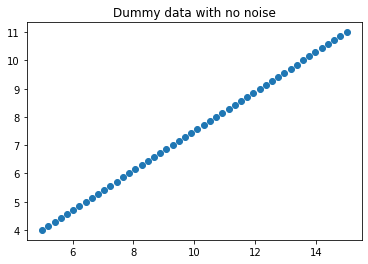

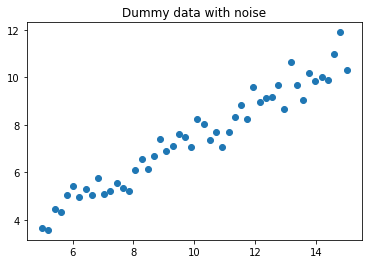

In [ ]:
#Create some dummy model data by choosing a_0=0.5 and a_1=0.7
x_dummy = np.linspace(start=5, stop=15, num=50)
y_dummy = 0.5+0.7*x_dummy

#Right now the data corresponds to exactly a straight line:
plt.figure()
plt.scatter(x_dummy,y_dummy)
plt.title('Dummy data with no noise')

#Let's add some noise to the data
noise = 0.5*np.random.normal(size=y_dummy.size)
y_dummy = y_dummy + noise
plt.figure()
plt.scatter(x_dummy,y_dummy)
plt.title('Dummy data with noise')

We want to use sklearn's LinearRegression function to figure out the values of $a_0,a_1$ from the data with noise. This function requires the x data to be in the form of a matrix. In this case, it has to have a shape (n,1) and not (n,)

(50,)
(50, 1)
a_0 is:
0.6026885462403904
a_1 is:
[0.68393652]
The predicted value of y at x=1.5 is:
[1.62859332]


Text(0.5, 1.0, 'Model fit')

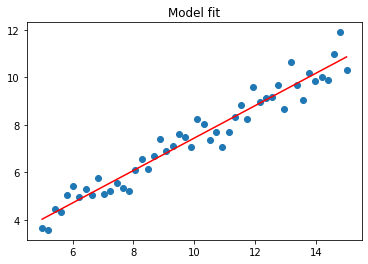

In [ ]:
#Currently the shape is not appropriate
print(np.shape(x_dummy))
x_dummy_reshaped = x_dummy.reshape(len(x_dummy),1)
#Now the shape is correct
print(np.shape(x_dummy_reshaped))


#Syntax for the LinearRegression function
reg = LinearRegression().fit(x_dummy_reshaped, y_dummy)
#The constant coefficient (a_0 in this case) is stored in reg.intercept_
a_0=reg.intercept_
print('a_0 is:')
print(a_0)
#Note that a_0 is not exactly 0.5 as we initially used - this is due to the random error

#The slope (a_1 in this case) is stored in reg.coef_
a_1=reg.coef_
print('a_1 is:')
print(a_1)

#You can use the fitted model to predict. Here predicting at x=1.5
print('The predicted value of y at x=1.5 is:')
print(reg.predict(np.array([[1.5]])))


plt.figure()
plt.scatter(x_dummy,y_dummy)
plt.plot(x_dummy_reshaped,reg.predict(x_dummy_reshaped),color='red')
plt.title('Model fit')

You can also use LinearRegression to do polynomial regression. Let's say you want to fit a model like $y=a_0+a_1x+a_2x^2$ between some data $x_i,y_i;i=0...n-1$. All you need to do is to create an $x$ matrix whose first column has all the $x$ values and the second column has all the $x^2$ values.

a_0 is:
-0.566813001169578
a_1,a_2 are:
a_1=
2.557189753608706
a_2=
1.899668933522843


Text(0.5, 1.0, 'Model fit')

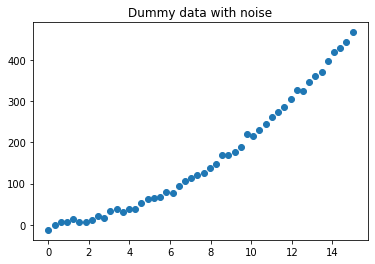

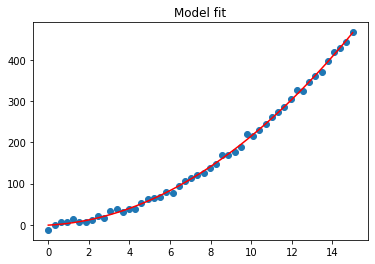

In [ ]:
a_0,a_1,a_2 = 3.,1.,2.
x_dummy = np.linspace(start=0, stop=15, num=50)
y_dummy = a_0+a_1*x_dummy+a_2*x_dummy**2
noise = 5.*np.random.normal(size=y_dummy.size)
y_dummy = y_dummy + noise
plt.figure()
plt.scatter(x_dummy,y_dummy)
plt.title('Dummy data with noise')

#Create an X matrix with the proper shape for LinearRegression
X=np.empty((len(x_dummy),2))
X[:,0]=x_dummy
X[:,1]=x_dummy**2

#Fit a model
reg = LinearRegression().fit(X, y_dummy)
print('a_0 is:')
print(reg.intercept_)

print('a_1,a_2 are:')
print('a_1=')
print(reg.coef_[0])
print('a_2=')
print(reg.coef_[1])

plt.figure()
plt.scatter(x_dummy,y_dummy)
plt.plot(x_dummy,reg.predict(X),color='red')
plt.title('Model fit')

#########This example becomes even more interesting if you increase the noise above. That significantly changes the calculated values of a_0,a_1,a_2.

You can use scipy's curve_fit to do nonlinear model fitting. Let's say you want to fit a model $y=ae^{bx}$ where $a,b$ are constants which need to be determined from data $x_i,y_i;i=0...n-1$. One way to solve this problem is to take a log of both sides: $\log(y)=\log(a)+bx$ and now it becomes a simple linear regression problem between variables $\log(y),x$. Another way is to use curve_fit and directly solve the nonlinear fit problem.

a=
0.49753111007377526
b=
0.5004534364681374


Text(0.5, 1.0, 'Model fit')

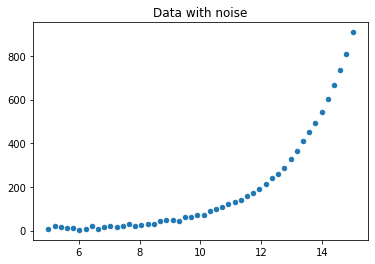

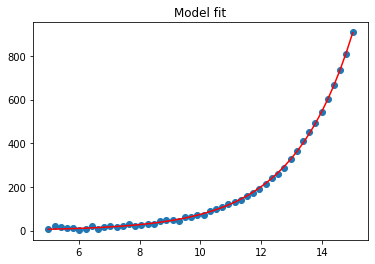

In [ ]:
# Function to calculate the exponential with constants a and b
def exponential(x, a, b):
    return a*np.exp(b*x)

# Generate dummy dataset
x_dummy = np.linspace(start=5, stop=15, num=50)

# Calculate y-values based on dummy x-values
y_dummy = exponential(x_dummy, 0.5, 0.5)

# Add noise from a Gaussian distribution
noise = 5*np.random.normal(size=y_dummy.size)
y_dummy = y_dummy + noise

# Plot the noisy exponential data
plt.figure()
plt.scatter(x_dummy, y_dummy, s=20)
plt.title('Data with noise')

# Fit the dummy exponential data
pars, cov = curve_fit(f=exponential, xdata=x_dummy, ydata=y_dummy, p0=[0, 0], bounds=(-np.inf, np.inf))
##More details about this are given here: https://towardsdatascience.com/basic-curve-fitting-of-scientific-data-with-python-9592244a2509
print('a=')
print(pars[0])

print('b=')
print(pars[1])


plt.figure()
plt.scatter(x_dummy,y_dummy)
plt.plot(x_dummy,exponential(x_dummy,pars[0],pars[1]),color='red')
plt.title('Model fit')